In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [3]:
conn = sqlite3.connect('data.db')
table1 = "test_table"
table2 = "overhead"
table3 = "entry_cnt"
cmd = f'''
SELECT 
    "{table1}".run_id,
    monitor_tag,
    workers,
    tasks_per_trial,
    trial,
    "{table1}".app_name,
    time_diff,
    "{table3}".record_num,
    (time_diff / "{table3}".record_num) AS time_per_record
FROM "{table1}"
JOIN "{table2}"
    ON "{table1}".run_id = "{table2}".run_id
JOIN "{table3}"
    ON "{table1}".run_id = "{table3}".run_id
'''

tasks = pd.read_sql_query(cmd, conn)
tasks

,run_id,monitor_tag,workers,tasks_per_trial,trial,app_name,time_diff,record_num,time_per_record
0,070907b5-fa98-4c0d-b13e-8f0fa1dfc689,htex,1,128,1,noop,11086.005369,4,2771.501342
1,dfd887cc-2ed5-443f-a9df-b6ec483cf478,htex,1,128,1,sleep10ms,25291.589603,5,5058.317921
2,8611b521-795f-434d-826a-064124912e76,htex,1,128,1,sleep100ms,18503.253208,17,1088.426659
3,75835fe3-0374-44b7-87cc-612ec6a3efdd,diaspora,1,128,1,noop,27273.835754,32,852.307367
4,4db81b82-131e-41ca-9716-c2d8c1e2acc5,diaspora,1,128,1,sleep10ms,11227.283888,40,280.682097
...,...,...,...,...,...,...,...,...,...
415,e9042390-3aac-4936-8fe4-6bae28c35d02,htex,64,128,10,sleep10ms,19106.294214,181,105.559637
416,2a79ac9b-e238-40f5-9054-bbfe58f7acc8,htex,64,128,10,sleep100ms,13737.581211,167,82.260965
417,f00b404f-0571-4a60-b6b3-0e3265975150,diaspora,64,128,10,noop,24896.872156,927,26.857467
418,068b0ba2-76cd-4a29-8050-bfca096aa2dc,diaspora,64,128,10,sleep10ms,19644.169044,985,19.943319


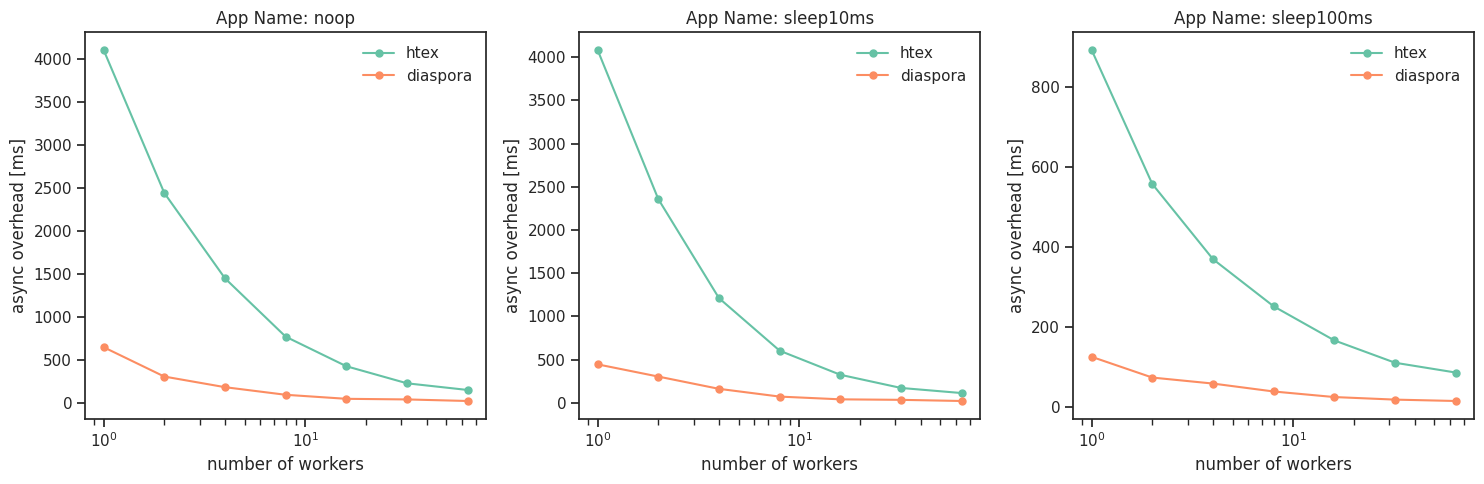

In [4]:
# total overhead
monitor_tags = ['htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['time_per_record']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'time_per_record', marker='o', ms=5, logx=True, label=monitor_tag, ax=ax)
    ax.set_ylabel('async overhead [ms]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')

In [6]:
conn = sqlite3.connect('data.db')
table1 = "test_table"
table2 = "overhead"
cmd = f'''
SELECT "{table1}".run_id,monitor_tag,workers,tasks_per_trial,trial,"{table1}".app_name,time_diff FROM "{table1}"
JOIN "{table2}"
ON '{table1}'.run_id = '{table2}'.run_id
'''
tasks = pd.read_sql_query(cmd, conn)
tasks

,run_id,monitor_tag,workers,tasks_per_trial,trial,app_name,time_diff
0,070907b5-fa98-4c0d-b13e-8f0fa1dfc689,htex,1,128,1,noop,11086.005369
1,dfd887cc-2ed5-443f-a9df-b6ec483cf478,htex,1,128,1,sleep10ms,25291.589603
2,8611b521-795f-434d-826a-064124912e76,htex,1,128,1,sleep100ms,18503.253208
3,75835fe3-0374-44b7-87cc-612ec6a3efdd,diaspora,1,128,1,noop,27273.835754
4,4db81b82-131e-41ca-9716-c2d8c1e2acc5,diaspora,1,128,1,sleep10ms,11227.283888
...,...,...,...,...,...,...,...
415,e9042390-3aac-4936-8fe4-6bae28c35d02,htex,64,128,10,sleep10ms,19106.294214
416,2a79ac9b-e238-40f5-9054-bbfe58f7acc8,htex,64,128,10,sleep100ms,13737.581211
417,f00b404f-0571-4a60-b6b3-0e3265975150,diaspora,64,128,10,noop,24896.872156
418,068b0ba2-76cd-4a29-8050-bfca096aa2dc,diaspora,64,128,10,sleep10ms,19644.169044


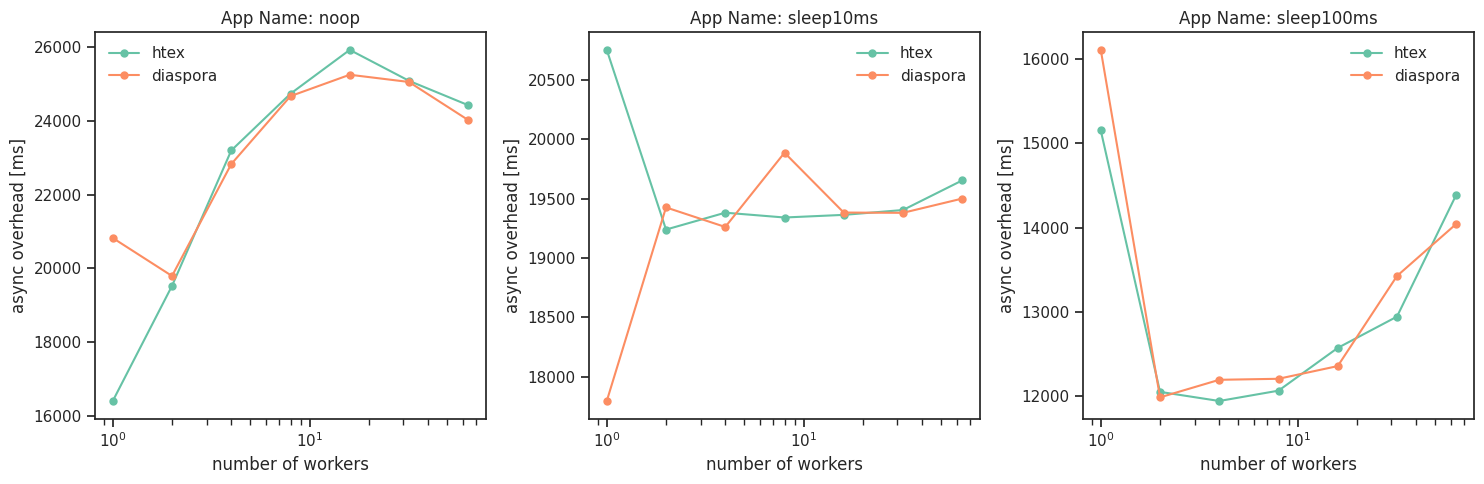

In [8]:
# total overhead
monitor_tags = ['htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['time_diff']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'time_diff', marker='o', ms=5, logx=True, label=monitor_tag, ax=ax)
    ax.set_ylabel('async overhead [ms]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')

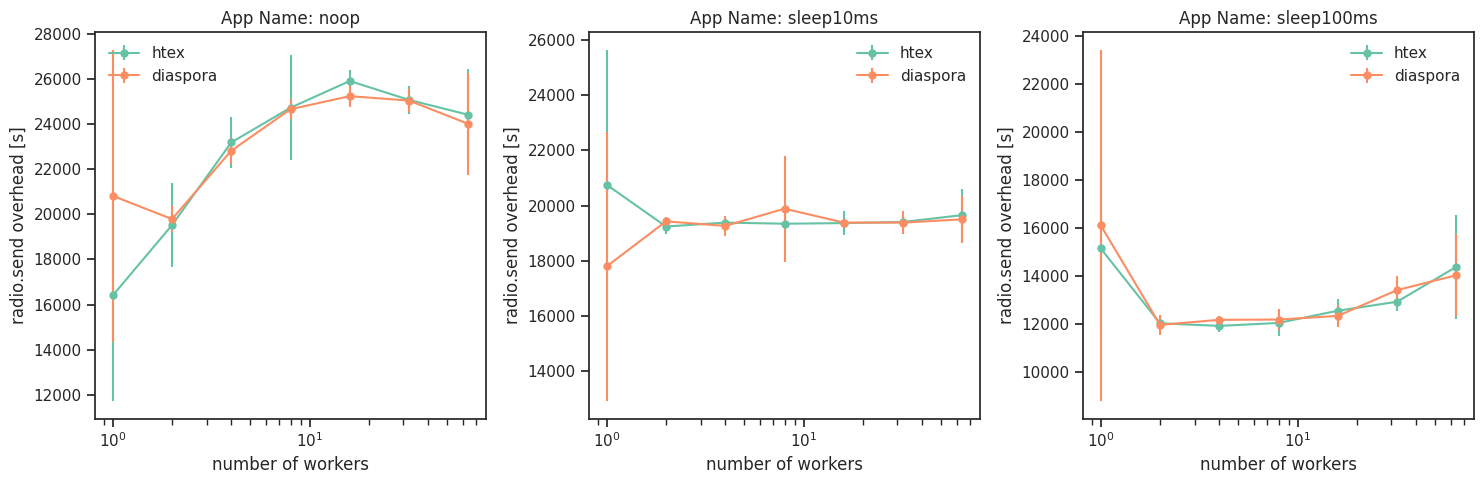

In [7]:
# total overhead
monitor_tags = ['htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['time_diff']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'time_diff', marker='o', ms=5, logx=True, yerr=list(standard_deviations['time_diff']), label=monitor_tag, ax=ax)
    ax.set_ylabel('radio.send overhead [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')

In [4]:
conn = sqlite3.connect('data.db')
table1 = "test_table"
table2 = "time_cnt"
cmd = f'''
SELECT "{table1}".run_id,monitor_tag,workers,tasks_per_trial,trial,"{table1}".app_name, average_time FROM "{table1}"
JOIN "{table2}"
ON '{table1}'.run_id = '{table2}'.run_id
'''
tasks = pd.read_sql_query(cmd, conn)
tasks

,run_id,monitor_tag,workers,tasks_per_trial,trial,app_name,average_time
0,070907b5-fa98-4c0d-b13e-8f0fa1dfc689,htex,1,128,1,noop,0.000095
1,dfd887cc-2ed5-443f-a9df-b6ec483cf478,htex,1,128,1,sleep10ms,0.000083
2,8611b521-795f-434d-826a-064124912e76,htex,1,128,1,sleep100ms,0.000063
3,75835fe3-0374-44b7-87cc-612ec6a3efdd,diaspora,1,128,1,noop,0.057603
4,4db81b82-131e-41ca-9716-c2d8c1e2acc5,diaspora,1,128,1,sleep10ms,0.033781
...,...,...,...,...,...,...,...
315,32e60b31-5743-408c-a424-8547279b58a4,diaspora,32,128,3,noop,0.002421
316,e633c065-bb4c-4a8f-8a25-d141d76db0f9,diaspora,32,128,3,sleep10ms,0.002286
317,bb99ce04-8d57-41e1-9629-2359130b5f1f,diaspora,32,128,3,sleep100ms,0.001651
318,b34f8e2e-b591-4b7b-9048-c969cf1f8eb2,htex,32,128,4,noop,0.000051


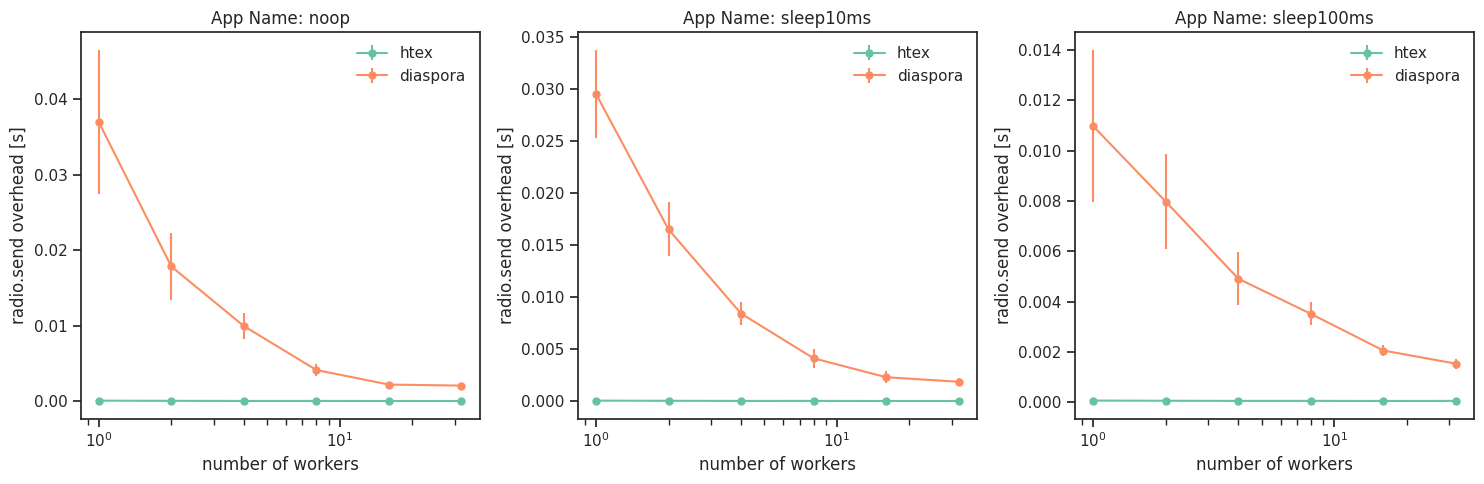

In [5]:
# diaspora.send overhead
monitor_tags = ['htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['average_time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'average_time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['average_time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('radio.send overhead [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')